In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

In [5]:
BCCO = pd.read_csv(r'Bank_customer_churn_outside.csv')

In [7]:
BCCO.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [9]:
BCCO.shape

(245725, 11)

In [11]:
BCCO.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [24]:
BCCO = BCCO.drop(['Credit_Product'], axis=1)
BCCO = BCCO.drop(['ID'], axis=1)
BCCO = BCCO.drop(['Region_Code'], axis=1)

In [26]:
BCCO.isnull().sum()

Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [112]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
BCCO[BCCO.select_dtypes(include=['object']).columns] = BCCO[BCCO.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [114]:
BCCO.corr()

,Gender,Age,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
Gender,1.000000,0.152076,0.031536,0.150586,0.146380,0.022477,0.064207,0.072068
Age,0.152076,1.000000,-0.127753,0.605543,0.631242,0.145232,0.218770,0.230814
Occupation,0.031536,-0.127753,1.000000,0.123937,0.027156,-0.038496,0.077208,0.012415
Channel_Code,0.150586,0.605543,0.123937,1.000000,0.537852,0.099911,0.249655,0.261211
Vintage,0.146380,0.631242,0.027156,0.537852,1.000000,0.167433,0.209356,0.279642
Avg_Account_Balance,0.022477,0.145232,-0.038496,0.099911,0.167433,1.000000,0.076637,0.053370
Is_Active,0.064207,0.218770,0.077208,0.249655,0.209356,0.076637,1.000000,0.085723
Is_Lead,0.072068,0.230814,0.012415,0.261211,0.279642,0.053370,0.085723,1.000000


In [115]:
# Sampling

In [169]:
from sklearn.model_selection import train_test_split
BCCO_train, BCCO_test = train_test_split(BCCO,test_size=.2)


In [171]:
BCCO_train.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
230793,0,47,3,2,91,669377,1,1
225704,0,28,1,0,26,1087268,0,0
139564,1,43,0,2,103,2815657,1,1
30900,1,76,1,1,51,1875025,1,0
81477,1,27,1,0,31,1603833,0,0


In [173]:
BCCO_test.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
21727,0,65,1,1,92,1399943,1,1
91619,1,54,3,1,97,845046,0,0
187049,1,82,1,1,62,1114484,1,0
156633,0,69,1,2,110,722893,1,0
9826,0,29,2,0,25,510548,0,0


In [175]:
BCCO_train_x = BCCO_train.iloc[:,1::]
BCCO_train_y = BCCO_train.iloc[:,0]

BCCO_test_x = BCCO_test.iloc[:,1::]
BCCO_test_y = BCCO_test.iloc[:,0]

In [177]:
BCCO_train_x.head()

,Age,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
230793,47,3,2,91,669377,1,1
225704,28,1,0,26,1087268,0,0
139564,43,0,2,103,2815657,1,1
30900,76,1,1,51,1875025,1,0
81477,27,1,0,31,1603833,0,0


In [179]:
BCCO_train_y.head()

230793    0
225704    0
139564    1
30900     1
81477     1
Name: Gender, dtype: int32

In [181]:
BCCO_test_x.head()

,Age,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
21727,65,1,1,92,1399943,1,1
91619,54,3,1,97,845046,0,0
187049,82,1,1,62,1114484,1,0
156633,69,1,2,110,722893,1,0
9826,29,2,0,25,510548,0,0


In [183]:
BCCO_test_y.head()

21727     0
91619     1
187049    1
156633    0
9826      0
Name: Gender, dtype: int32

In [185]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [187]:
lr.fit(BCCO_train_x, BCCO_train_y)

C:\Users\om\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [189]:
pred = lr.predict(BCCO_test_x)
pred

array([1, 1, 1, ..., 1, 1, 0])

In [191]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix

In [193]:
BCCO_tab = confusion_matrix(BCCO_test_y, pred)
BCCO_tab

array([[10178, 12146],
       [ 8308, 18513]], dtype=int64)

In [195]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(BCCO_test_y, pred)*100

58.380303184454164

In [197]:
# Recall
from sklearn.metrics import recall_score
recall_score(BCCO_test_y, pred)*100

69.02427202565154

In [199]:
# Precision
from sklearn.metrics import precision_score
precision_score(BCCO_test_y, pred)*100

60.38357415440817

In [201]:
# F1 ratio
from sklearn.metrics import f1_score
f1_score(BCCO_test_y, pred)*100

64.41544885177453

In [203]:
pred_proba = lr.predict_proba(BCCO_test_x)
pred_proba

array([[0.33593157, 0.66406843],
       [0.39492132, 0.60507868],
       [0.36387251, 0.63612749],
       ...,
       [0.48042274, 0.51957726],
       [0.46812394, 0.53187606],
       [0.53661138, 0.46338862]])

In [205]:
# Auroc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc_score(BCCO_test_y, pred)*100

57.30822990280965

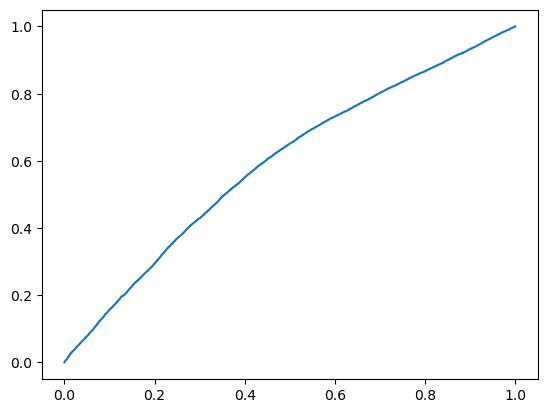

In [207]:
fpr,tpr,ther = roc_curve(BCCO_test_y,pred_proba[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=None,min_samples_split=100 )

In [213]:
dtree.fit(BCCO_train_x, BCCO_train_y)

DecisionTreeClassifier(criterion='entropy', min_samples_split=100)

In [215]:
dec_pred = dtree.predict(BCCO_test_x)
dec_pred

array([1, 0, 1, ..., 0, 1, 0])

In [217]:
dtree_tab = confusion_matrix(BCCO_test_y, dec_pred)
dtree_tab

array([[10363, 11961],
       [10075, 16746]], dtype=int64)